In [152]:
from scipy.integrate import solve_ivp  #Solve an initial value problem for a system of ODEs
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import scipy
from numpy import linalg as LA

In [217]:
# define constants
a,b,F,G = 0.25,4,8,1
# Fv=np.array([a*F,G,0])
# Fv

In [138]:
t=np.arange(0,200+0.1,0.1)

In [139]:
# defining F for the solver
def f(t,Y):
    #print(t)
    x,y,z=Y
    #A=np.array([[0,-y,-z],[y,0,-b*z],[z,b*x,0]])
    #B=np.array([[-a,0,0],[0,-1,0],[0,0,-1]])
    #return np.dot(A,Y)+np.dot(B,Y)+Fv
    y_dot = np.zeros(3)
    y_dot[0] = -a*x - y**2-z**2 + a*F
    y_dot[1] = x*y - y -b*x*z + G
    y_dot[2] = x*z + b*x*y - z
    
    return(y_dot)

In [140]:
# manual check of F
f(0,[1,1,1])

array([-0.25, -3.  ,  4.  ])

In [141]:
y0=[1,1,1]  #initial conditions

In [142]:
# ‘RK45’ Explicit Runge-Kutta method of order 5(4)
# t_eval Times at which to store the computed solution, must be sorted and lie within t_span.
# t_span Interval of integration (t0, tf). The solver starts with t=t0 and integrates until it reaches t=tf.
r=solve_ivp(f,t_span=(0.0,200),y0=y0,method='RK45',max_step=0.1,t_eval=t[1:])
r.status # 0 -success

0

In [143]:
r.t.shape

(2000,)

In [144]:
x,y,z=r.y

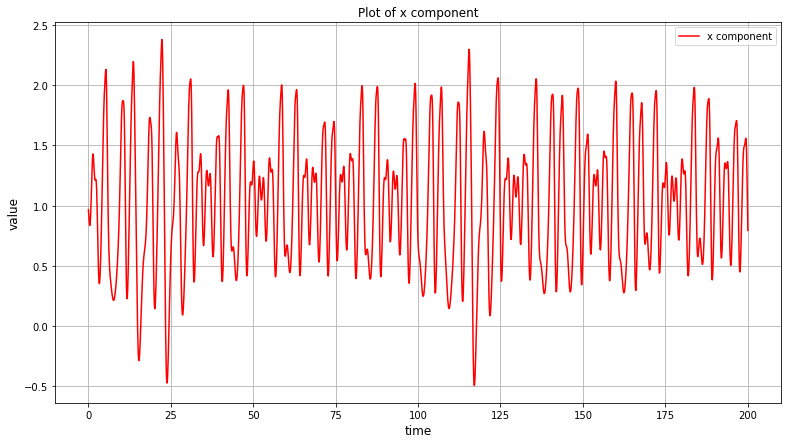

In [145]:
# plotting X
fig=plt.figure(figsize=(13,7))
ax=plt.axes()
ax.grid()
ax.set_title('Plot of x component', fontsize='large')
ax.set_xlabel("time",fontsize='large')
ax.set_ylabel("value",fontsize='large')
ax.plot(r.t,x,color="red",label="x component")
ax.legend()

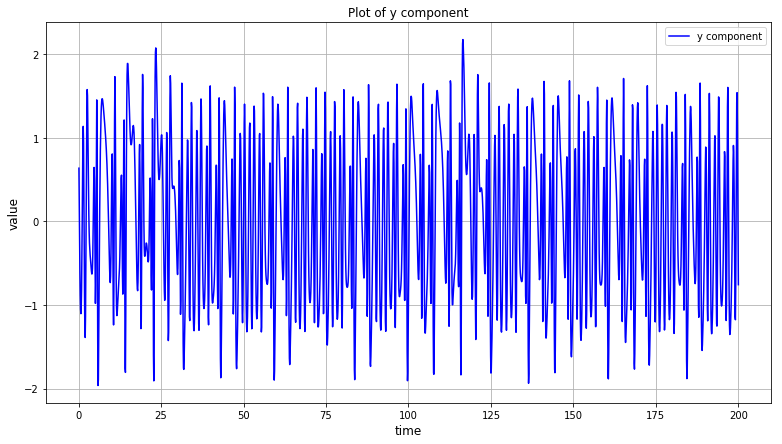

In [146]:
# plotting Y
fig=plt.figure(figsize=(13,7))
ax=plt.axes()
ax.grid()
ax.set_title('Plot of y component', fontsize='large')
ax.set_xlabel("time",fontsize='large')
ax.set_ylabel("value",fontsize='large')
ax.plot(r.t,y,color="blue",label="y component")
ax.legend()

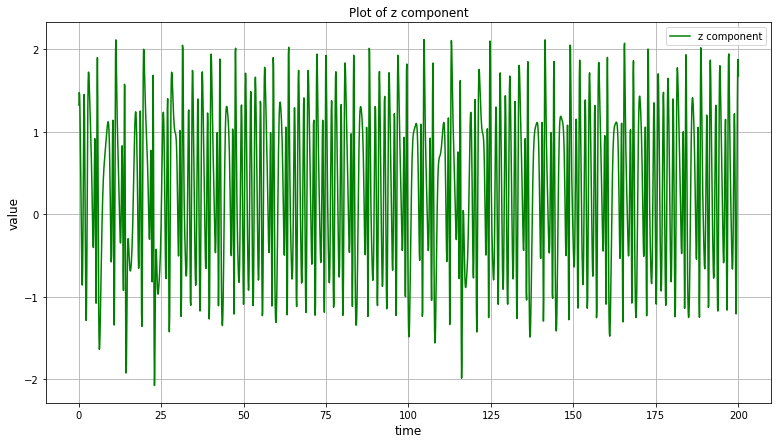

In [147]:
# plotting Z
fig=plt.figure(figsize=(13,7))
ax=plt.axes()
ax.grid()
ax.set_title('Plot of z component', fontsize='large')
ax.set_xlabel("time",fontsize='large')
ax.set_ylabel("value",fontsize='large')
ax.plot(r.t,z,color="green",label="z component")
ax.legend()

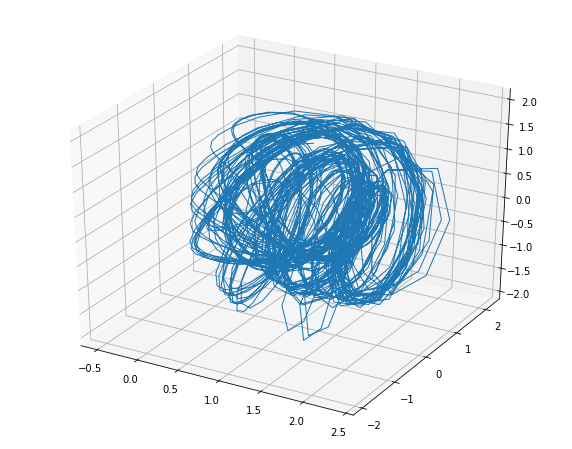

In [148]:
# Plot of the trajectory in the x-y-z space
fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(111,projection='3d')
ax.plot(x,y,z,linewidth=1)

In [233]:
#function for the calculation of the stiffness factor
def stiff(Y):
    x,y,z=Y
    mat=np.array([[-a,-2*y,-2*z],[(y-b*z),(x-1),-b*x],[(z+b*y),b*x,(x-1)]]) # Jacobian matrix
    va, ve = LA.eig(mat)    # calculate eigenvalues, eigenvectors
    R=np.real(va)  # real components of the eigenvalues
    A=np.abs(R)  # abs real components of the eigenvalues
    st=A.max()/A.min()  # calculating stiffness factor
    return st

In [234]:
# applying the stiff function for all the calculated values of vector Y at any moment of time
stiff_l=[]
for s in range(0,r.y.shape[1]):
    Y=r.y[:,s]
    stiff_l.append(stiff(Y))

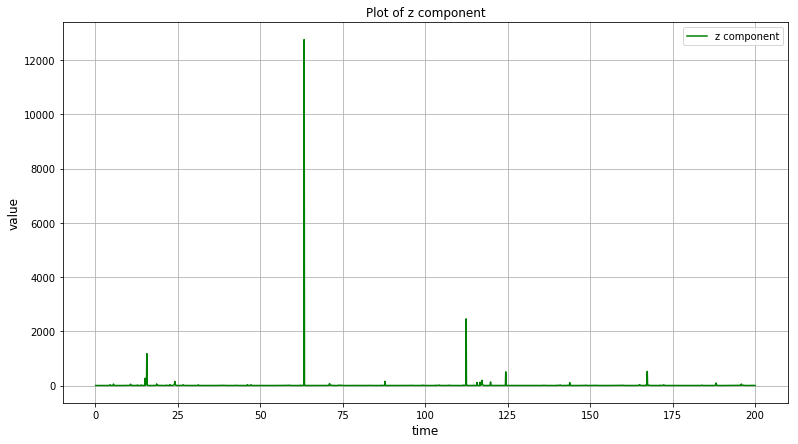

In [235]:
# plotting Stiffness factor over the course of integration
fig=plt.figure(figsize=(13,7))
ax=plt.axes()
ax.grid()
ax.set_title('Stiffness factor over ', fontsize='large')
ax.set_xlabel("time",fontsize='large')
ax.set_ylabel("value",fontsize='large')
ax.plot(r.t,stiff_l,color="green",label="stiffness factor")
ax.legend()